# Metaheurística de Recozimento Simulado

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML


### Vamos otimizar a função de Ackley, dada por:

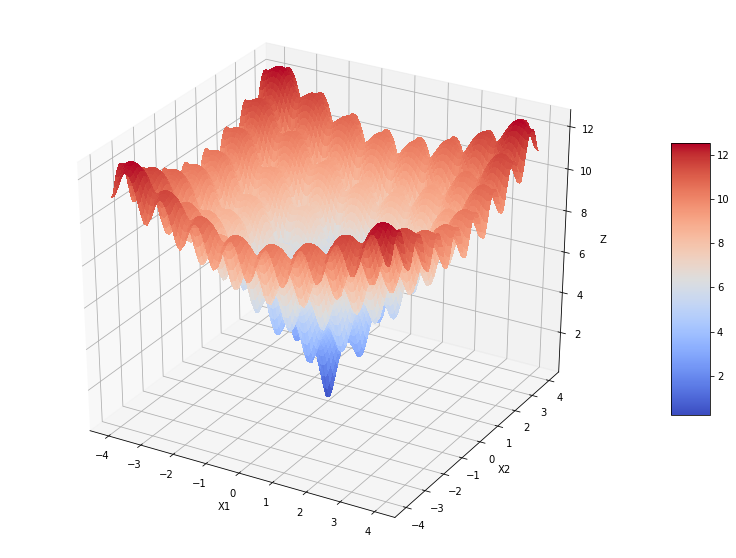

In [198]:
def ackley(x1,x2):
    
    a = 20
    
    return -a*(np.exp((-a/100)*np.sqrt(0.5*(x1**2+x2**2)))) - np.exp(0.5*(np.cos(2*np.pi*x1)+np.cos(2*np.pi*x2))) + np.exp(1) + 20

step = 100

x1 = np.linspace(-4, 4, step)
x2 = np.linspace(-4, 4, step)

x1, x2 = np.meshgrid(x1,x2)

z = ackley(x1,x2)

fig = plt.figure(figsize=(14,10))

ax = fig.gca(projection='3d')

surf = ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')

plt.show()

Seu Mínimo Global está localizado em $(0,0)$.

# Desenvolvendo o Algoritmo de Recozimento Simulado

In [158]:
def inicializa_candidato(lim_superior,lim_inferior):
    
    candidato = np.random.uniform(lim_inferior,lim_superior,2)

    z_inicial = ackley(candidato[0], candidato[1])
    
    return candidato, z_inicial



def perturba_candidato(candidato, lim_superior, lim_inferior, step):

    new_candidato = candidato + step*np.random.normal(0,0.33,2)*np.array([np.abs(lim_superior-lim_inferior),np.abs(lim_superior-lim_inferior)])    

    
def animate(x1,x2,ims,ax2):
    z = ackley(x1,x2)
    im = ax2.plot(x1,x2,"o",c='red')
    ims.append(im)
    return ims


def simulated_annealing(lim_sup,lim_inf, max_it,step,temp):

    candidato, z_c = inicializa_candidato(lim_sup,lim_inf)
    
    curr, curr_eval = np.copy(candidato), np.copy(z_c)
    
    historico_x1 = []
    
    x1_otimo = []
    
    x2_otimo = []
    
    historico_x2 = []
    
    best_eval = []
    
    best_ = np.copy(curr_eval)
    
    best_eval.append(curr_eval)
    
    
    for i in range(max_it):
        
        candidato = curr + np.random.normal(0,0.33,2) * step * np.array([np.abs(lim_sup-lim_inf),np.abs(lim_sup-lim_inf)])
        
        candidato[candidato>lim_sup] = lim_sup
        
        candidato[candidato<lim_inf] = lim_inf
        
        historico_x1.append(candidato[0])
        
        historico_x2.append(candidato[0])
        
        candidato_eval = ackley(candidato[0],candidato[1])
        
        best_eval.append(candidato_eval)

        if candidato_eval < best_:

            best = candidato
            best_ = candidato_eval
            

        diff = candidato_eval - curr_eval
        
        t = temp / float(i + 1)
        
        metropolis = np.exp(-diff / t)
        
        if diff < 0 or np.random.rand() < metropolis:

            curr, curr_eval = candidato, candidato_eval
            
        x1_otimo.append(curr[0])
    
        x2_otimo.append(curr[1])
        
    return x1_otimo, x2_otimo, best_eval, historico_x1, historico_x2



def visualiza_resultados(funcao_objetivo, lista_x1, lista_x2):

    plt.figure(figsize=(8,16))
    plt.subplot(3,1,1)
    plt.plot(funcao_objetivo)
    plt.grid()
    plt.xlabel('Iteração')
    plt.ylabel('Função Objetivo')
    plt.title('Minimização da Função de Rastrigin')

    plt.subplot(3,1,2)
    plt.plot(lista_x1)
    plt.grid()
    plt.xlabel('Iteração')
    plt.ylabel('X1')
    plt.title('Variação de X1')

    plt.subplot(3,1,3)
    plt.plot(lista_x2)
    plt.grid()
    plt.xlabel('Iteração')
    plt.ylabel('X2')
    plt.title('Variação de X2')

    print('X1 Ótimo: ', lista_x1[-1])

    print('X2 Ótimo: ', lista_x2[-1])

    print('Função Objetivo Valor Ótimo: ', funcao_objetivo[-1])


In [189]:
x1_otimo, x2_otimo, best_eval, historico_x1, historico_x2 = simulated_annealing(lim_sup=4,lim_inf=-4, max_it=1000,step=0.01,temp=100)

# Visualização dos Resultados


Como trata-se de uma metaheurística, não há garantia de convergência. Além do mais, por ser uma função não-convexa, apresenta diversos mínimos locais. No geral, os resultados estão próximos do ponto ótimo (0,0) com valor de função objetivo = 0.

X1 Ótimo:  0.0024635218102030537
X2 Ótimo:  0.008624384325339612
Função Objetivo Valor Ótimo:  0.027509989396374834


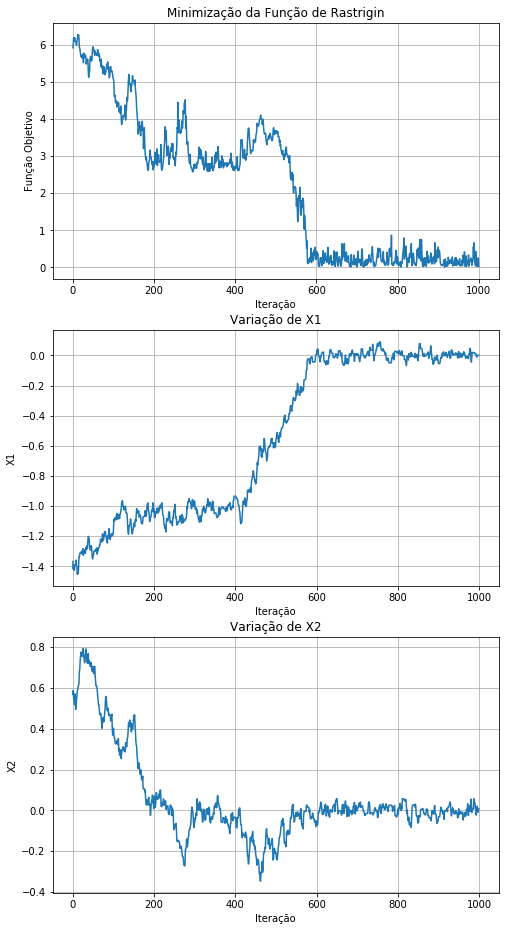

In [190]:
visualiza_resultados(best_eval, x1_otimo, x2_otimo)

# Visualização da Convergência

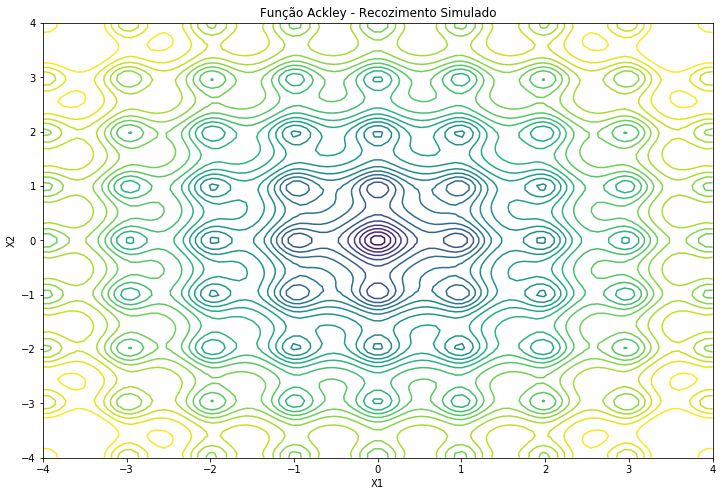

In [201]:
fig, ax = plt.subplots(figsize=(12,8))

step = 100

x1 = np.linspace(-4, 4, step)
x2 = np.linspace(-4, 4, step)

x1, x2 = np.meshgrid(x1,x2)

z = ackley(x1,x2)

plt.contour(x1,x2,z,np.arange(0,12,0.5))

plt.title('Função Ackley - Recozimento Simulado')

plt.xlabel('X1')


plt.ylabel('X2')
     
ims = []


for i in range(len(historico_x1)):

    ims = animate(historico_x1[i],historico_x2[i],ims,ax)

anim = animation.ArtistAnimation(fig,ims, interval=30, repeat_delay=1000)

HTML(anim.to_html5_video())

O algoritmo de recozimento simulado não é baseado em população. Sua principal aplicação é para a realização de uma busca local na vizinhança de um determinado ponto.